In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train[9]

array([[[125, 125, 116],
        [110, 101,  91],
        [102,  90,  83],
        ...,
        [202, 207, 214],
        [200, 205, 212],
        [202, 208, 214]],

       [[142, 146, 142],
        [146, 144, 139],
        [176, 172, 170],
        ...,
        [195, 201, 205],
        [198, 205, 209],
        [204, 211, 215]],

       [[180, 185, 183],
        [143, 146, 146],
        [156, 157, 157],
        ...,
        [122, 111, 113],
        [139, 128, 131],
        [158, 147, 150]],

       ...,

       [[104,  82,  41],
        [101,  80,  39],
        [101,  81,  38],
        ...,
        [126, 103,  67],
        [126, 103,  69],
        [125, 101,  68]],

       [[104,  81,  40],
        [105,  84,  41],
        [109,  88,  43],
        ...,
        [138, 113,  78],
        [137, 113,  80],
        [137, 112,  81]],

       [[105,  83,  42],
        [108,  87,  45],
        [115,  94,  50],
        ...,
        [143, 117,  82],
        [143, 116,  84],
        [144, 116,  86]]

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [9]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15, 2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

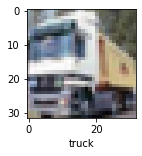

In [10]:
plot_sample(X_train, y_train, 1)

In [11]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [12]:
X_train = X_train/255
X_test = X_test/255

In [15]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes= 10, dtype='float32'
)

In [17]:
X_train.shape

(50000, 32, 32, 3)

In [18]:
ann = models.Sequential([
                           layers.Flatten(input_shape=(32,32,3)),
                           layers.Dense(3000, activation = 'relu'),
                           layers.Dense(1000, activation = 'relu'),
                           layers.Dense(10, activation = 'sigmoid')
])
ann.compile(optimizer = 'SGD',
            loss = 'categorical_crossentropy',
            metrics = ['accuracy'])
ann.fit(X_train, y_train_categorical, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 13s 7ms/step - loss: 1.8116 - accuracy: 0.3554
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6222 - accuracy: 0.4268
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5401 - accuracy: 0.4574
Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4791 - accuracy: 0.4798
Epoch 5/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4299 - accuracy: 0.4969
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3868 - accuracy: 0.5128
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3480 - accuracy: 0.5286
Epoch 8/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3129 - accuracy: 0.5400
Epoch 9/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2813 - accuracy: 0.5533
Epoch 10/50
1563/1563 [==============================] - 11s 7ms/step - l

In [19]:
ann.evaluate(X_test, y_test_categorical)

313/313 [==============================] - 2s 6ms/step - loss: 1.6023 - accuracy: 0.5558


[1.6022902727127075, 0.5558000206947327]

In [22]:
classes[np.argmax(ann.predict(X_test)[1])]

'ship'

In [24]:
classes[y_test[1]]

'ship'

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.63      0.66      1000
           1       0.64      0.69      0.66      1000
           2       0.47      0.48      0.48      1000
           3       0.31      0.61      0.41      1000
           4       0.59      0.43      0.50      1000
           5       0.51      0.34      0.40      1000
           6       0.67      0.56      0.61      1000
           7       0.73      0.52      0.60      1000
           8       0.65      0.72      0.68      1000
           9       0.59      0.58      0.59      1000

    accuracy                           0.56     10000
   macro avg       0.58      0.56      0.56     10000
weighted avg       0.58      0.56      0.56     10000

